<div align="center">
    <h1><u>Projet Pics</u></h1>
</div>

> Ce projet consiste à créer 3 représentations graphiques différentes à partir d'un base 4 fichiers CSV.

<h4>Importation des bibliothèques</h4>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

<h4>Importation des fichiers CSV utilisés</h4>

In [8]:
fic_chaussures = pd.read_table(
        "Fichiers/Chaussures.csv",
        decimal = ",",
        sep = ";"
)

fic_pic = pd.read_table(
        "Fichiers/Pic.csv",
        decimal = ",",
        sep = ";"
)

fic_origines = pd.read_table(
        "Fichiers/Origine.csv",
        decimal = ",",
        sep = ";"
)

fic_sommets = pd.read_table(
        "Fichiers/Sommet.csv",
        decimal = ",",
        sep = ";"
)

<h4>Analyse bivariée</h4>
<h4>Répartition des sexes en fonction du pic gravis</h4>

Text(0.5, 1.0, 'Répartition des sexes en fonction du pic gravis')

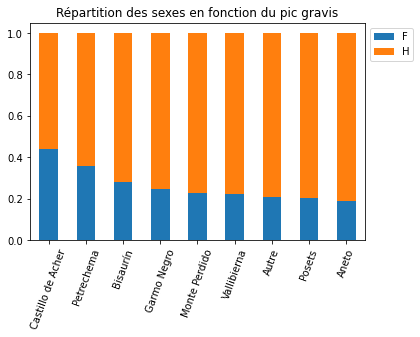

In [9]:
Sexe = fic_pic['Sexe']

corresp = {'Aneto' : 'Aneto',
           'Aragüells' : 'Autre',
           'Aspe' : 'Autre',
           'Bachimala' : 'Autre',
           'Bacías' : 'Autre',
           'Bisaurín' : 'Bisaurín',
           'Castillo de Acher' : 'Castillo de Acher',
           'Cilindro' : 'Autre',
           'Collarada' : 'Autre',
           'Cotiella' : 'Autre',
           'Garmo Negro' : 'Garmo Negro',
           'Infiernos' : 'Autre',
           'La Facha' : 'Autre',
           'La Munia' : 'Autre',
           'Monte Perdido' : 'Monte Perdido',
           'Mulleres' : 'Autre',
           'Petrechema' : 'Petrechema',
           'Peña Forca' : 'Autre',
           'Pico de Alba' : 'Autre',
           'Posets' : 'Posets',
           'Punta Escuzana' : 'Autre',
           'Punta Las Olas' : 'Autre',
           'Punta Suelza' : 'Autre',
           'Robiñera' : 'Autre',
           'Tendeñera' : 'Autre',
           'Vallibierna' : 'Vallibierna'
}

fic_pic['pico'] = fic_pic['pico'].map(corresp)

Pico = fic_pic['pico']

SexePico = pd.crosstab(Pico, Sexe, normalize="index")

SexePico.sort_values("F", ascending=False).plot(
    kind="bar",
    stacked=True
)

plt.xticks(rotation=70)
plt.xlabel('')

plt.legend(bbox_to_anchor =(1, 1), ncol = 1)

plt.title("Répartition des sexes en fonction du pic gravis")

<h4>Altitude moyenne en fonction du sommet (Diagramme en barre)</h4>

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

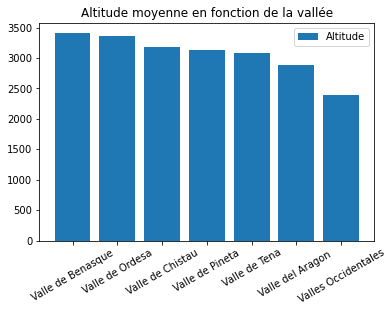

In [10]:
Vallee = fic_sommets['Zone (Carte)']

df = fic_sommets

Altitude = df.groupby(['Zone (Carte)']).mean()

df_sorted_desc = df.sort_values('Altitude', ascending=False)

plt.bar('Zone (Carte)', 'Altitude',data=df_sorted_desc)

plt.title("Altitude moyenne en fonction de la vallée")

plt.legend(['Altitude'])

plt.xticks(rotation=30)

<h4>Altitude moyenne en fonction du sommet (Boîte à moustache)</h4>

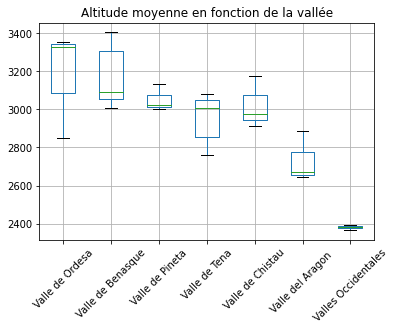

In [11]:
df = fic_sommets

g = df.groupby("Zone (Carte)")

df = pd.DataFrame({col: val['Altitude'] for col, val in g})

median = df.median()

median.sort_values(ascending=False, inplace=True)

df = df[median.index]

df.boxplot()

plt.title("Altitude moyenne en fonction de la vallée")

plt.xticks(rotation=45)

plt.show()